In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='seaborn-bright'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax, linewidth=1.5)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        
        plt.tight_layout()
    
    return

### White Noise (WN)

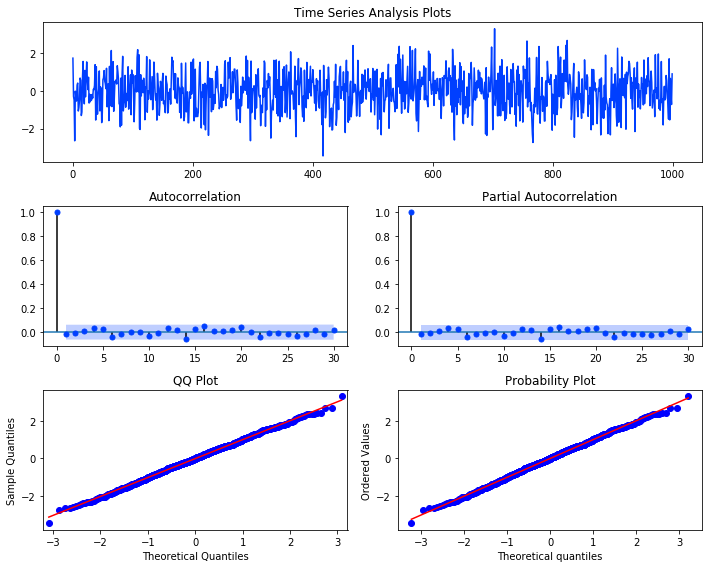

In [3]:
np.random.seed(11)
# Plotting discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

### Random work

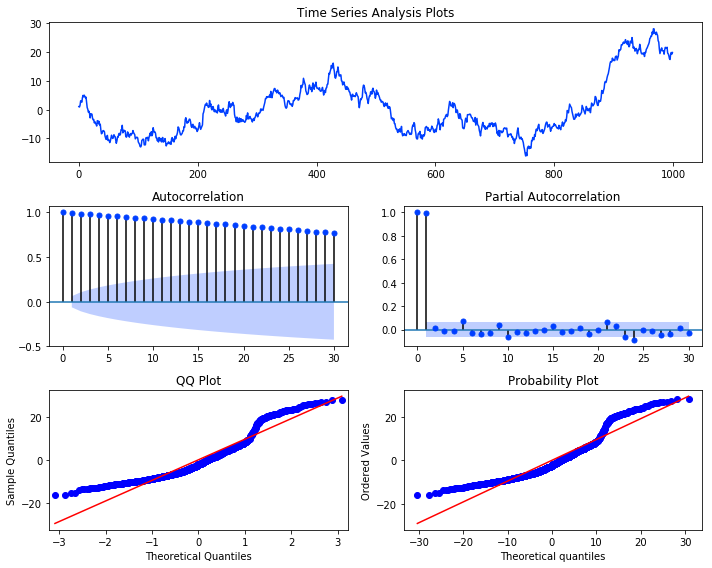

In [4]:
np.random.seed(42)
n_samples = 1000

ϵ = np.random.normal(size=n_samples)
x = ϵ.copy()
for t in range(n_samples):
    x[t] = x[t-1] + ϵ[t]

_ = tsplot(x, lags=30)

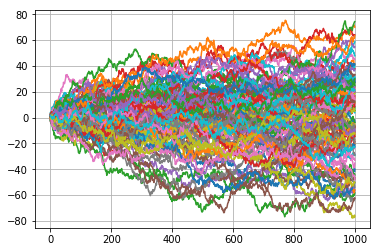

In [5]:
n_series = 100
np.random.seed(42)
n_samples = 1000

for n in range(n_series):
    ϵ = np.random.normal(size=n_samples)
    x = ϵ.copy()
    for t in range(n_samples):
        x[t] = x[t-1] + ϵ[t]
    plt.plot(x)
plt.grid()
plt.show()

### Difference

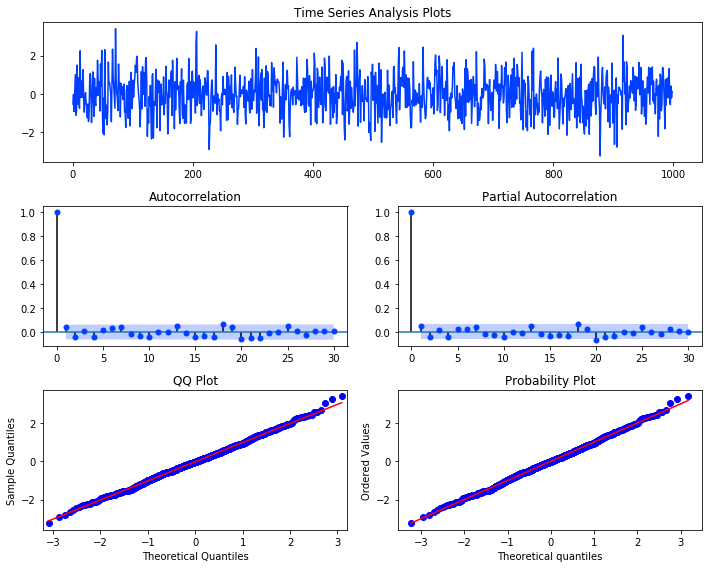

In [6]:
_ = tsplot(np.diff(x), lags=30)

### AR(1)모형

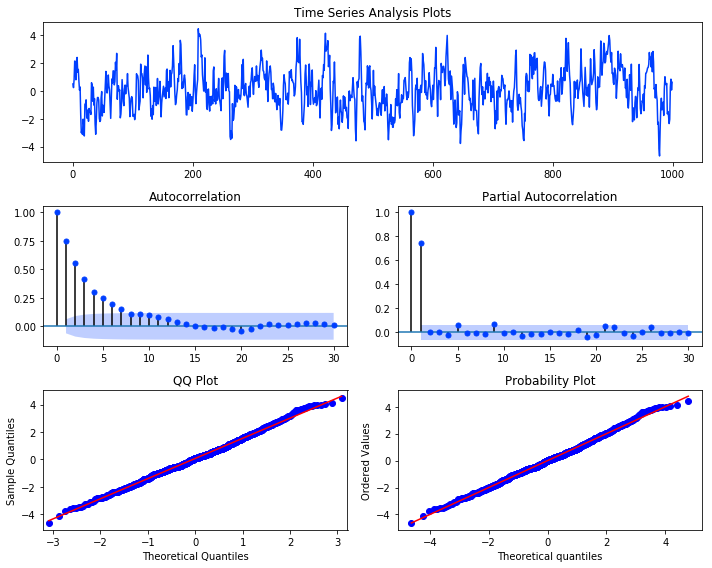

In [7]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1,-0.75])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### AR(2)모형

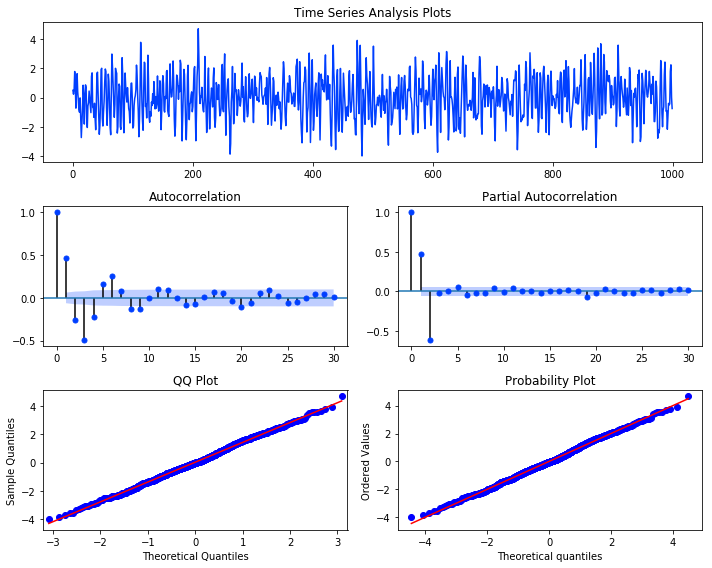

In [8]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1,-0.75, 0.6])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### MA(1)모형

/anaconda3/envs/QuantAlgo/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


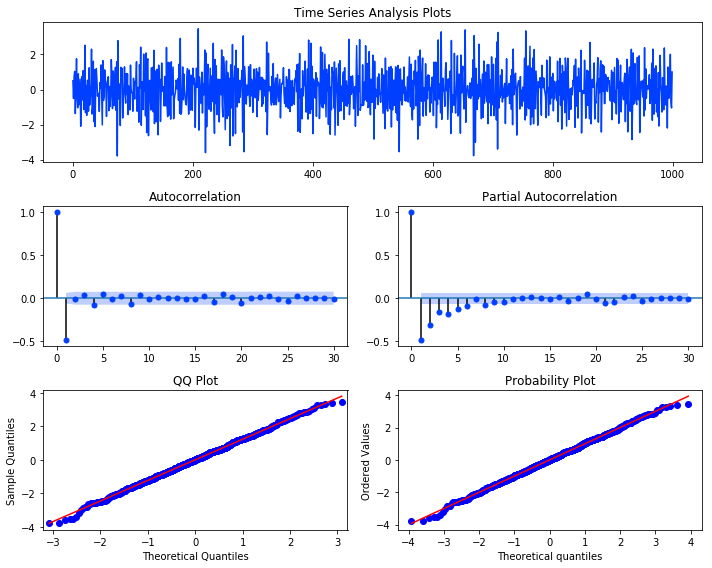

In [9]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1],[1,-0.75])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### MA(2) 모형

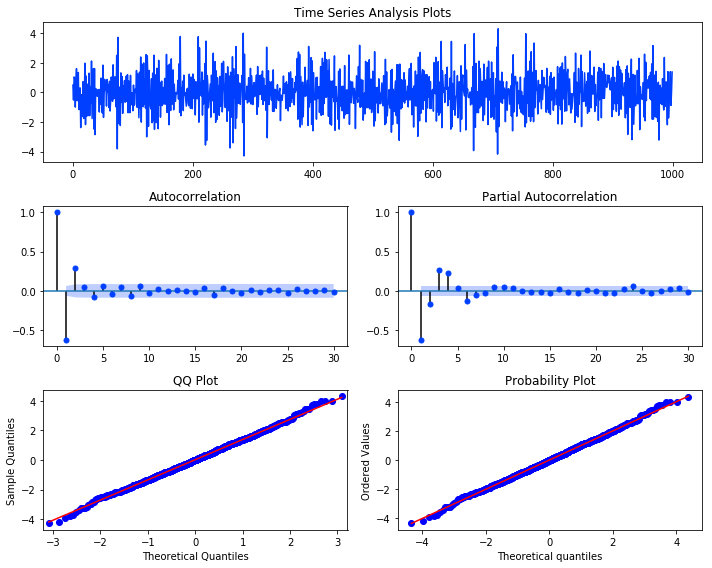

In [10]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1],[1,-0.75, 0.6])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### ARMA(1,1)모형

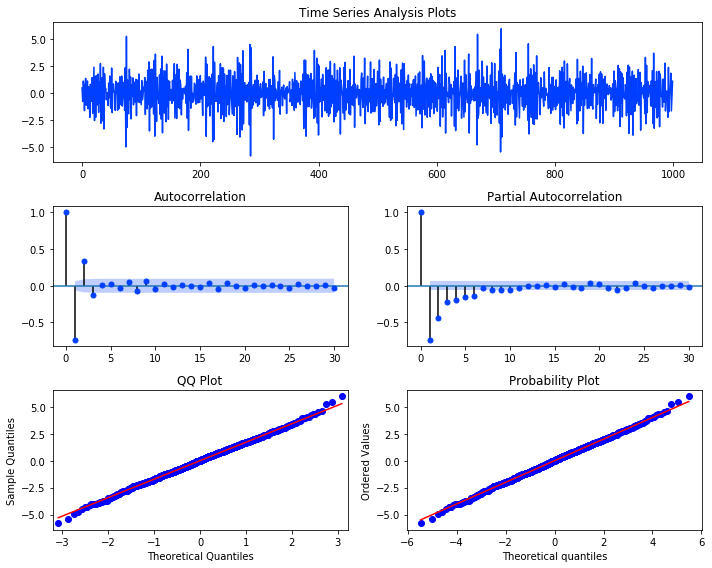

In [11]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1,0.5],[1,-0.75])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### ARMA(3,2) 모형

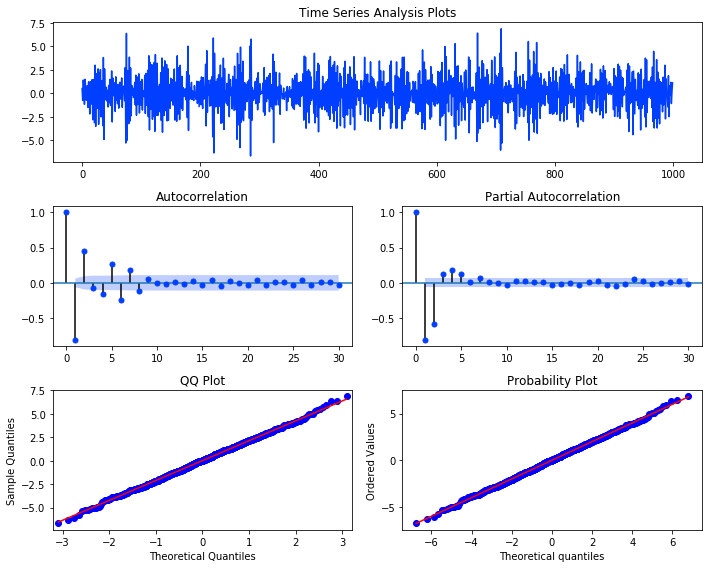

In [12]:
np.random.seed(42)
n_samples = 1000

x_ar_1 = smt.ArmaProcess([1,0.5, -0.35, -0.4],[1,-0.75, 0.2])
x = x_ar_1.generate_sample(n_samples,)

_ = tsplot(x, lags=30)

### Box-Jenkins 방법 - 최적의 ARMA 모형 추정

In [13]:
# 바로 위 예제에서 생성한 ARMA(3,2) smaple x의 차수를 추정해보자.
best_bic = np.inf
best_order = None
best_model = None
significance_level = 0.05

for i in range(5):
    for j in range(5):
        try:
            # (i,j)th order에 대한 ARMA 모형의 모수를 추정
            tmp_model = smt.ARMA(x, order=(i,j)).fit(method='mle', trend='nc')

            # 잔차의 white noise 여부를 검정
            tmp_diagnostic = sms.diagnostic.acorr_ljungbox(tmp_model.resid, lags=[20], boxpierce=False)[1][0]
            if tmp_diagnostic < significance_level:
                continue

            # BIC 기준으로 최적의 모델을 결정
            tmp_bic = tmp_model.bic
            if tmp_bic < best_bic:
                best_bic = tmp_bic
                best_order = (i,j)
                best_model = tmp_model
        except:
            continue

print("ARMA",best_order,"is the best model")

ARMA (3, 2) is the best model


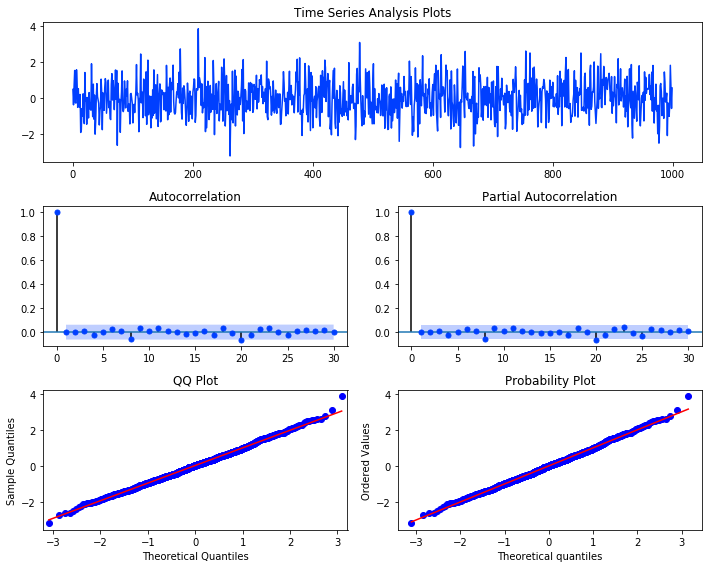

In [14]:
_ = tsplot(best_model.resid, lags = 30)

In [15]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(3, 2)   Log Likelihood               -1397.564
Method:                           mle   S.D. of innovations              0.978
Date:                Mon, 29 Apr 2019   AIC                           2807.128
Time:                        13:38:49   BIC                           2836.575
Sample:                             0   HQIC                          2818.320
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5234      0.070     -7.496      0.000      -0.660      -0.387
ar.L2.y        0.3607      0.097      3.729      0.000       0.171       0.550
ar.L3.y        0.4531      0.059      7.651      0.000       0.337       0.569
ma.L1.y       -0.7302      0.073     -9.944      0.000      -0.874      -0.586
ma.L2.y        0.1587      0.054      2.933      0.003       0.053       0.265
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3272           -0.0000j            1.3272           -0.0000
AR.2           -1.0617           -0.7320j            1.2895           -0.4039
AR.3           -1.0617           +0.7320j            1.2895            0.4039
MA.1            2.2998           -1.0050j            2.5099           -0.0656
MA.2            2.2998           +1.0050j            2.5099            0.0656
-----------------------------------------------------------------------------
"""

### Forecasting

In [16]:
def ForecastPlot(y, model, steps=10, length=100, figsize=(12, 6), style='seaborn-bright'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    forecast = model.forecast(steps=steps)[0]
#     forecast = np.r_[y[-1], forecast]
    
    with plt.style.context(style):
        ytail = y[len(y)-length:]   # 뒷 부분 100개만 그린다
        ax1 = np.arange(1, len(ytail) + 1)
        ax2 = np.arange(len(ytail), len(ytail) + len(forecast))
        plt.figure(figsize=figsize)
        plt.plot(ax1, ytail, 'b-o', markersize=3, color='blue', label='Time series', linewidth=1)
        plt.plot(ax2, forecast, color='red', label='Forecast')
        plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
        plt.title("Time Series Forcast")
        plt.legend()
        plt.show()
        
                


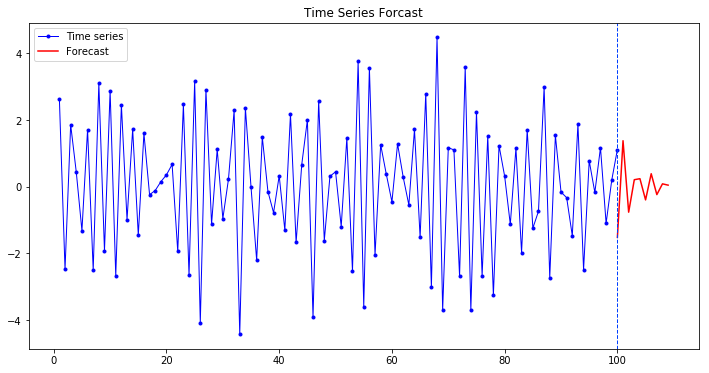

In [17]:
ForecastPlot(x, model = best_model)

### ARIMA(2,1,1) 모형

In [18]:
# ARIMA 모형은 statmodels.tsa.api에서 제공하지 않기 때문에 ARMA데이터를 generate 시킨 후 누적합을 구하는 방식으로 시뮬레이션 해야 한다.
# ARIMA 모형을 generate하는 function을 만들자.
import numpy as np
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs

def sampleARIMA(ar, d, ma, n):
    arparams = np.array(ar)
    maparams = np.array(ma)
    ar = np.hstack([1.0, -arparams])
    ma = np.hstack([1.0, -maparams])
    
    # ARMA generation
    x_arma = smt.ArmaProcess(ar, ma)
    x = x_arma.generate_sample(n)
    
    # Integration d times
    for i in np.arange(d):
        x = np.cumsum(x)
    
    return x 

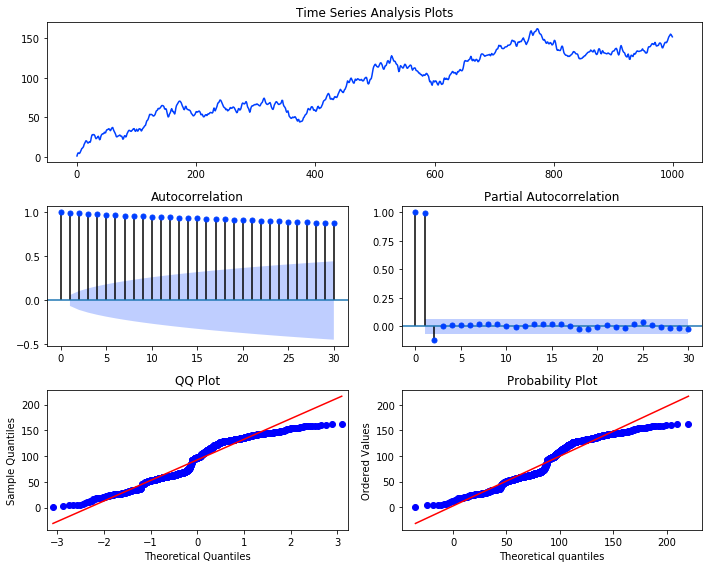

In [19]:
x_arima = sampleARIMA(ar = [0.5, -0.25], d = 1,ma = [-0.6], n = 1000)
_ = tsplot(x_arima, lags = 30)

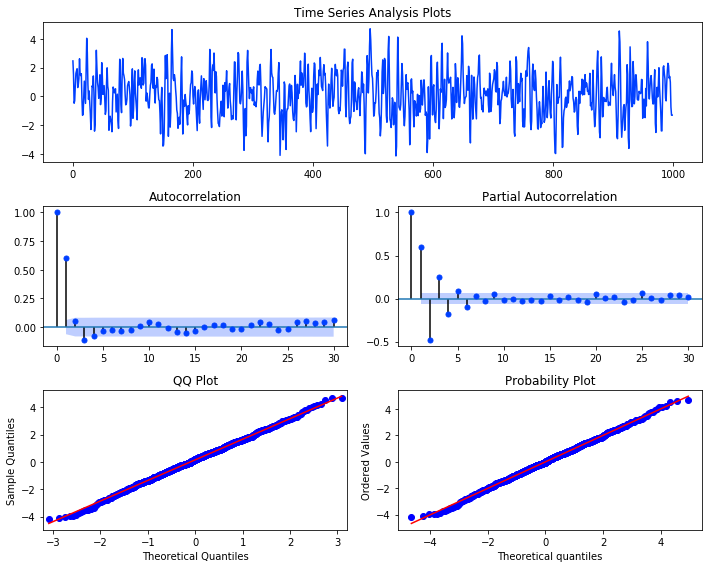

In [20]:
# 1번 차분하면 ARMA(2,1)가 된다.
_ = tsplot(np.diff(x_arima), lags=30)

In [21]:
best_bic = np.inf
best_order = None
best_model = None
significance_level = 0.05

for i in range(3):
    for d in range(3):
        for j in range(3):
            try:
                # (i,d, j)th order에 대한 ARIMA 모형의 모수를 추정
                tmp_model = smt.ARIMA(x_arima, order=(i,d,j)).fit(method='mle', trend='nc')

                # 잔차의 white noise 여부를 검정
                tmp_diagnostic = sms.diagnostic.acorr_ljungbox(tmp_model.resid, lags=[20], boxpierce=False)[1][0]
                if tmp_diagnostic < significance_level:
                    continue

                # BIC 기준으로 최적의 모델을 결정
                tmp_bic = tmp_model.bic
                if tmp_bic < best_bic:
                    best_bic = tmp_bic
                    best_order = (i,d,j)
                    best_model = tmp_model
            except:
                continue

print("ARIMA",best_order,"is the best model")

ARIMA (2, 1, 1) is the best model


In [22]:
sms.diagnostic.acorr_ljungbox(best_model.resid, lags=[20], boxpierce=False)[1][0]

0.9840738284643616

In [23]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1416.808
Method:                           mle   S.D. of innovations              0.999
Date:                Mon, 29 Apr 2019   AIC                           2841.617
Time:                        13:39:26   BIC                           2861.244
Sample:                             1   HQIC                          2849.077
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.4390      0.045      9.803      0.000       0.351       0.527
ar.L2.D.y     -0.1957      0.041     -4.788      0.000      -0.276      -0.116
ma.L1.D.y      0.6543      0.037     17.622      0.000       0.582       0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1217           -1.9627j            2.2606           -0.1674
AR.2            1.1217           +1.9627j            2.2606            0.1674
MA.1           -1.5283           +0.0000j            1.5283            0.5000
-----------------------------------------------------------------------------
"""

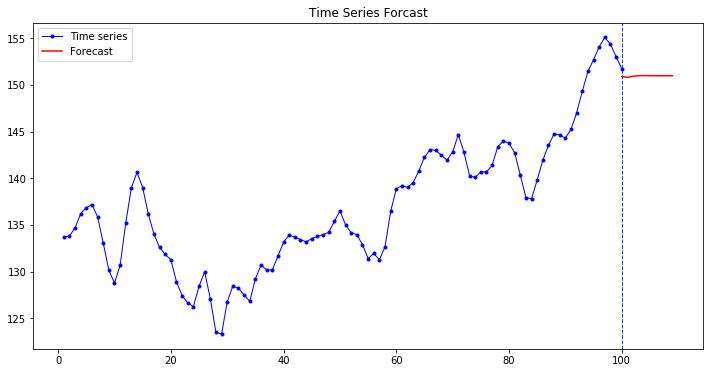

In [24]:
ForecastPlot(x_arima, best_model)

### 단위근 검정(Unit root test)

In [25]:
from statsmodels.tsa.stattools import adfuller
adfuller(x, autolag="BIC")
# nonstationary

(-12.550736087869275,
 2.20891088138134e-23,
 4,
 995,
 {'1%': -3.4369391965679257,
  '5%': -2.86444914142694,
  '10%': -2.5683189679553546},
 2771.221832326478)

In [26]:
adfuller(np.diff(x), autolag="BIC")
# stationary

(-16.2108286403514,
 3.98806949535664e-29,
 10,
 988,
 {'1%': -3.4369860032923145,
  '5%': -2.8644697838498376,
  '10%': -2.5683299626694422},
 2862.842363557718)

### ARCH(1) 모형

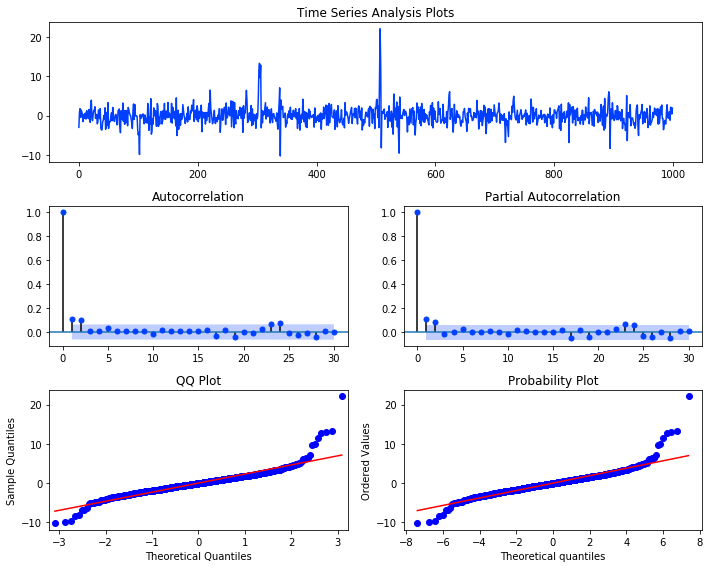

In [27]:
np.random.seed(100)

α_0 = 2
α_1 = 0.5

n = 1000

w = np.random.normal(size=n)
ϵ = w.copy()

for t in range(len(ϵ)):
    ϵ[t] = w[t] * np.sqrt((α_0 + α_1 * ϵ[t-1] ** 2))

    
tsplot(ϵ, lags=30)

white noise 같아 보인다

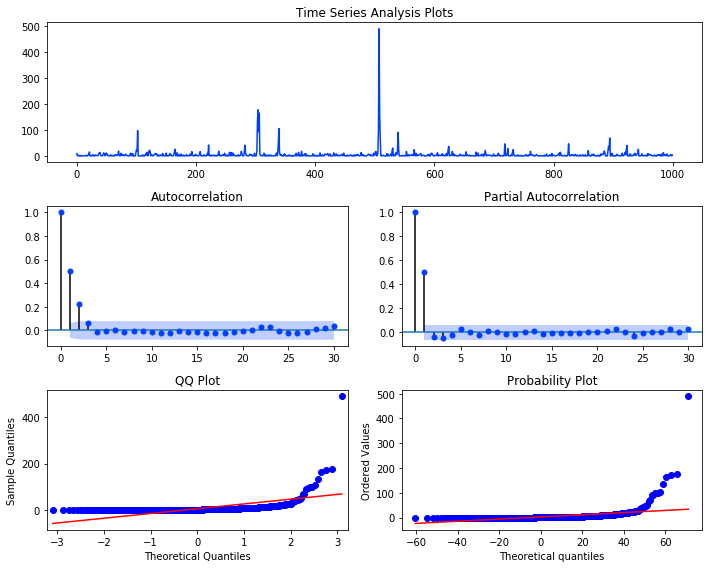

In [28]:
tsplot(ϵ ** 2, lags=30)

AR(1) process 모양이다.

### GARCH(1,1) 모형

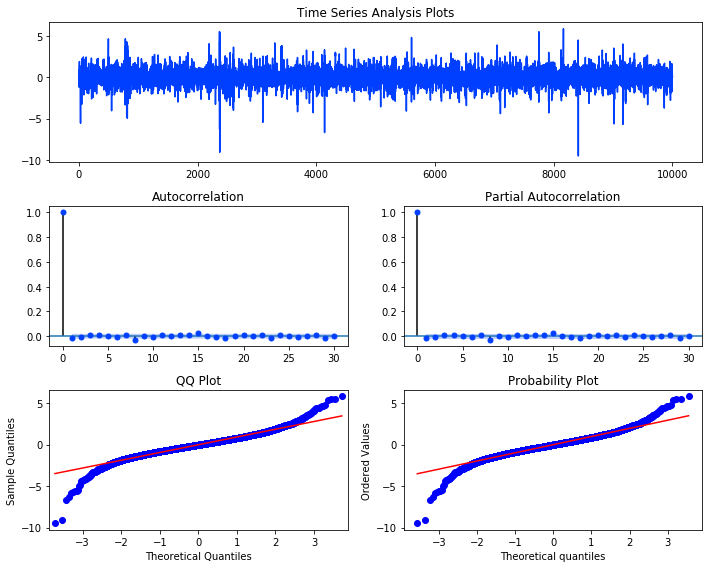

In [29]:
np.random.seed(12)

α_0 = 0.2
α_1 = 0.5
β_1 = 0.3

n = 10000
w = np.random.normal(size=n)

ϵ = np.zeros_like(w)
σ_sq = np.zeros_like(w)


for t in range(1, len(ϵ)):
    σ_sq[t] = α_0 + α_1 * (ϵ[t-1] ** 2) + β_1 * σ_sq[t-1]
    ϵ[t] = w[t] * np.sqrt(σ_sq[t])

    
tsplot(ϵ, lags=30)

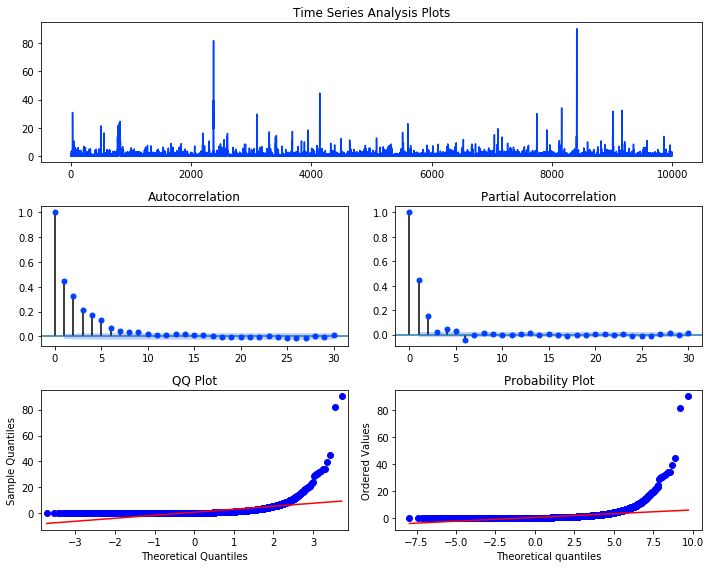

In [30]:
_ = tsplot(ϵ ** 2, lags=30)

ARMA(1,1) 형태이다

### ARCH, GARCH 모형의 Fitting

In [31]:
from arch import arch_model
am = arch_model(ϵ, p=1, q=1) # GARCH(1,1)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12338.442233999569
Iteration:      2,   Func. Count:     16,   Neg. LLF: 12338.265239578988
Iteration:      3,   Func. Count:     24,   Neg. LLF: 12317.99103724082
Iteration:      4,   Func. Count:     31,   Neg. LLF: 12198.07638595993
Iteration:      5,   Func. Count:     38,   Neg. LLF: 12129.45015931235
Iteration:      6,   Func. Count:     45,   Neg. LLF: 12113.665065526444
Iteration:      7,   Func. Count:     52,   Neg. LLF: 12104.54780058732
Iteration:      8,   Func. Count:     58,   Neg. LLF: 12096.676441475413
Iteration:      9,   Func. Count:     64,   Neg. LLF: 12095.57720672083
Iteration:     10,   Func. Count:     70,   Neg. LLF: 12095.541843834677
Iteration:     11,   Func. Count:     76,   Neg. LLF: 12095.537745684996
Iteration:     12,   Func. Count:     82,   Neg. LLF: 12095.537723865487
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12095.537723865935
            Iterati

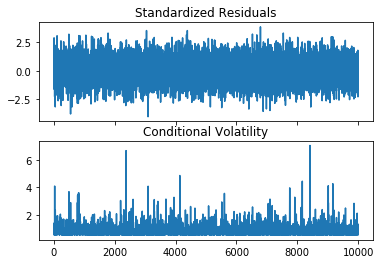

In [32]:
res.plot()
plt.show()

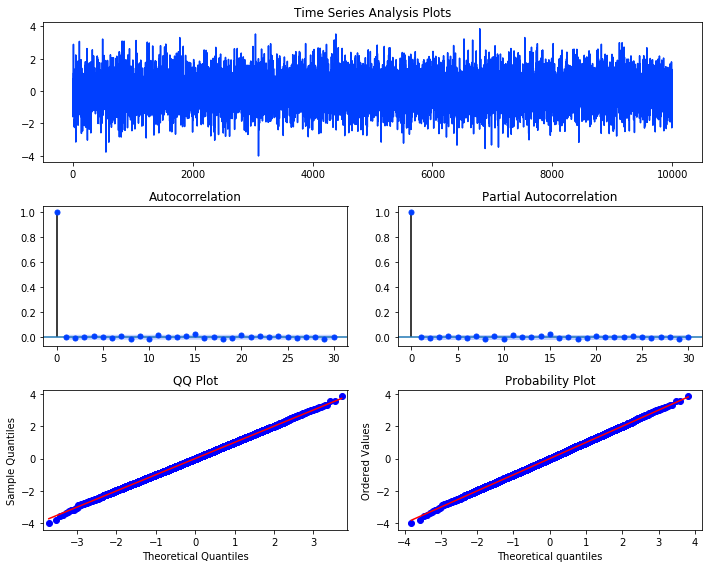

In [33]:
normalizedgam = ϵ/res.conditional_volatility
normalizedgam = normalizedgam - normalizedgam.mean()
_ = tsplot(normalizedgam, lags=30)

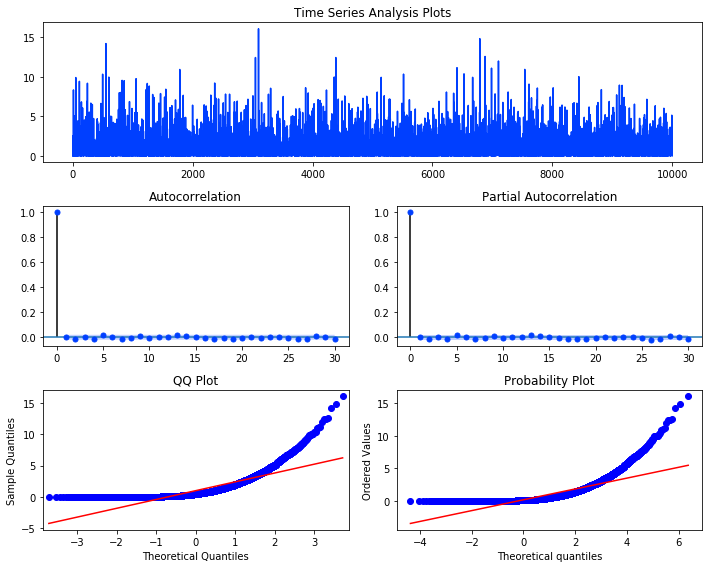

In [34]:
_ = tsplot(normalizedgam**2, lags=30)

### ARIMA+GARCH로 주가수익률 분석

In [ ]:
# KODEX200 다운로드
code = '069500'
url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
df = pd.DataFrame()
for page in range(1, 410):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
df = df[["날짜",'종가']]
df = df.rename(columns= {'날짜': 'Date', '종가': 'Close'})
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'], ascending=True)
df.set_index('Date', inplace=True)
df.to_csv("KODEX200.csv")


In [ ]:
df = pd.read_csv("KODEX200.csv", index_col='Date')
df['Return'] = np.log(df.Close/df.Close.shift(1))
df.dropna(inplace=True)
df.head()

### ARIMA & GARCH trading strategy.ipynb에 따로 작성함